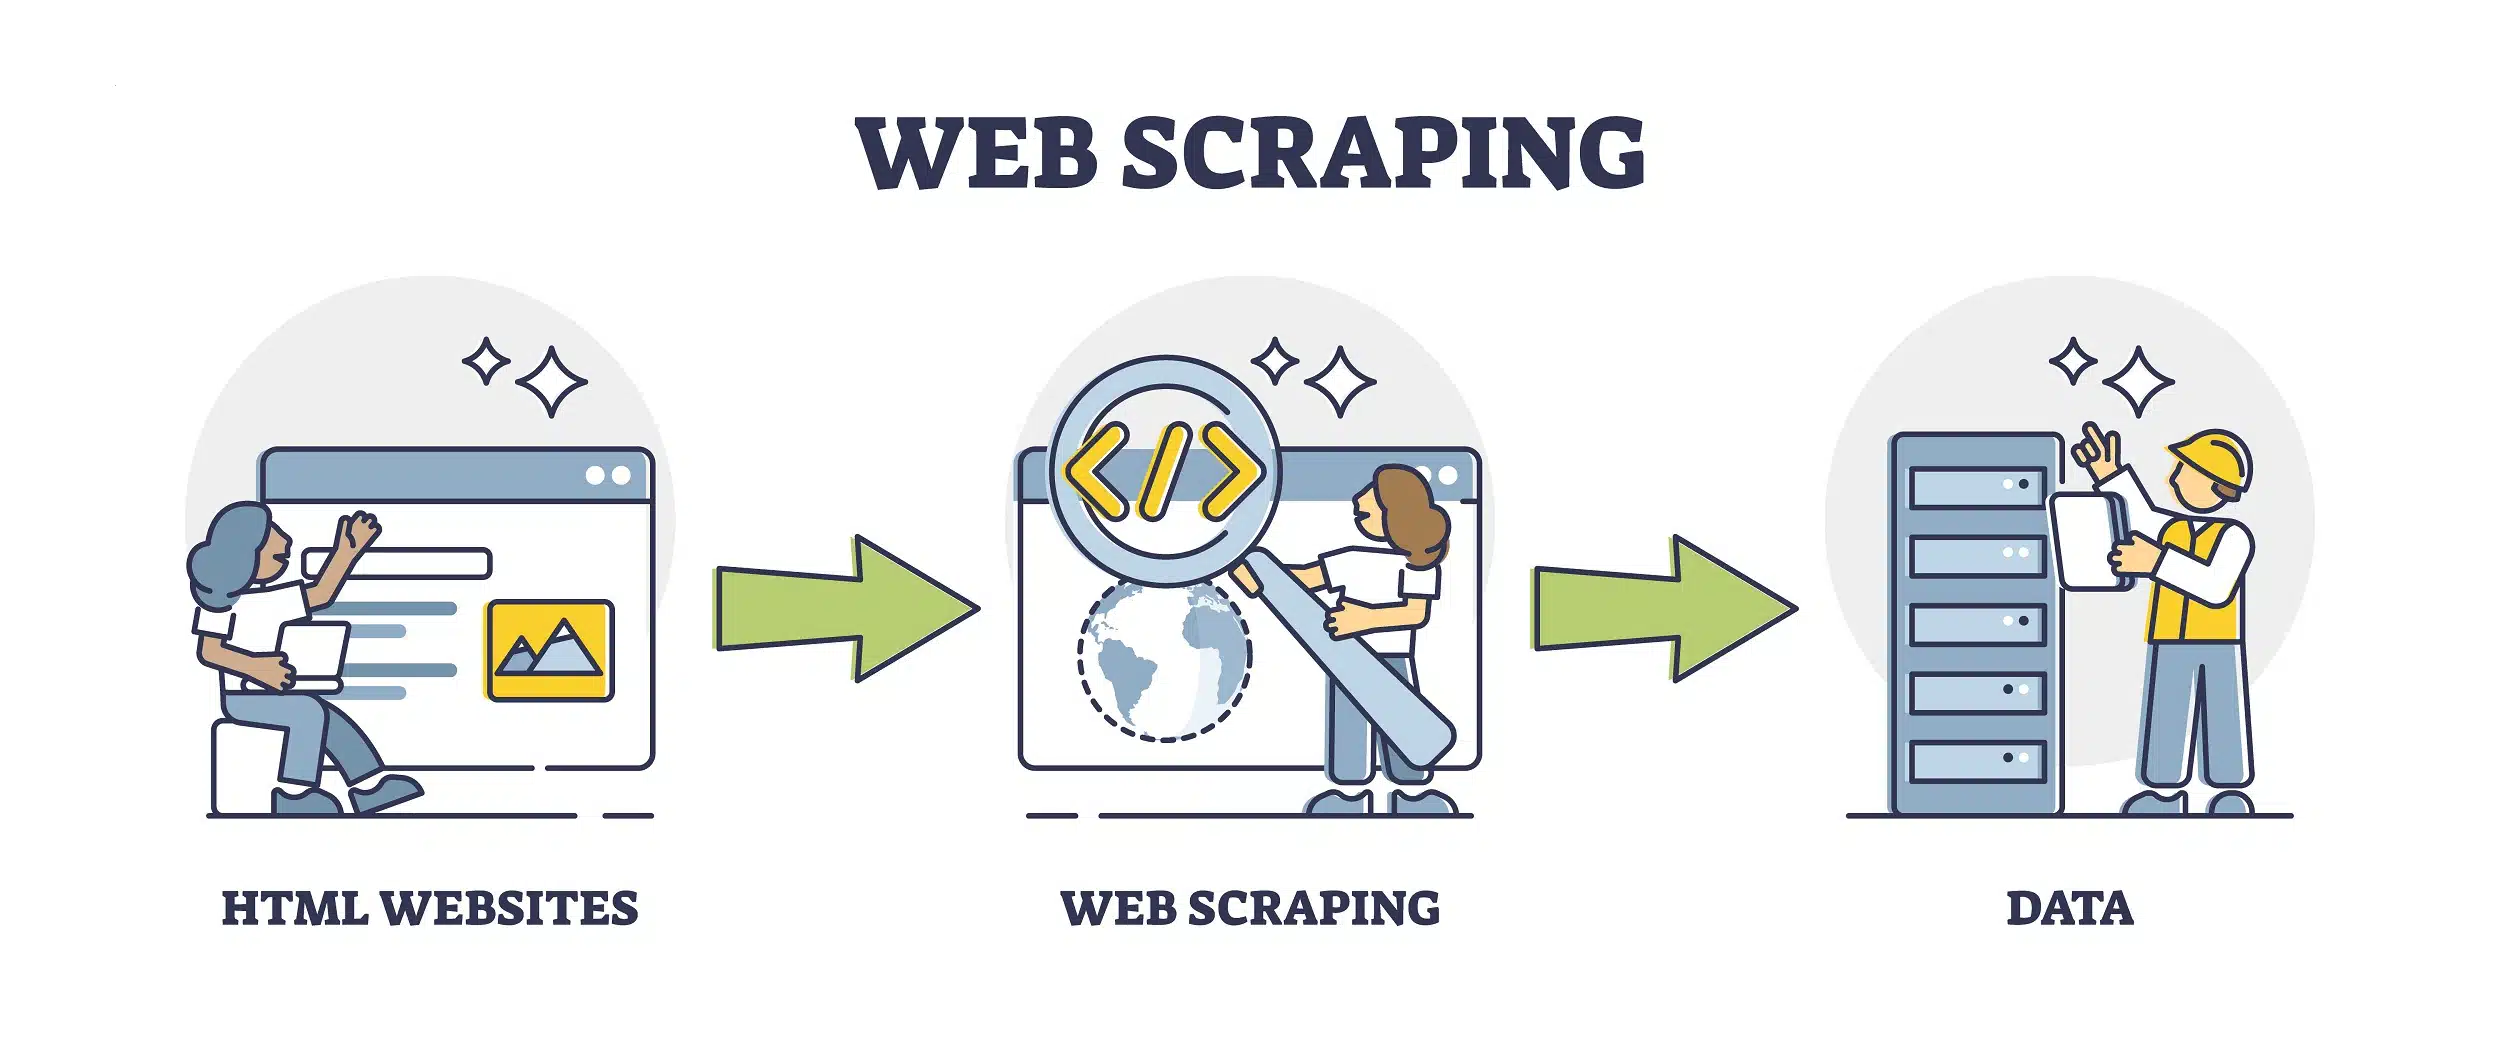

Nesse projeto estão os registros de meus estudos referente a técnica de Web Scraping, repositório Data Lake usando mongoDB e manipulação de dados por engenharia de atributos. 

## 1. Web Scraping

In [1]:
# Importação das bibliotecas e pacotes 

import requests
from bs4 import BeautifulSoup

### Seleção da URL 

In [2]:
# Site Omelete: 10 filmes com maior bilheteria da história do cinema

url = 'https://www.omelete.com.br/filmes/10-maiores-bilheterias-globais-da-historia#23'
response = requests.get(url) #solicitação da URL
soup = BeautifulSoup(response.content, 'html.parser')
#'content' é o conteúdo não processado da resposta http e o 'html.parser' informa qual é o tipo do conteúdo

### Extração dos Dados da Página Web

In [3]:
# Função para extração das tags html da página web

def extrair_dados(tag):
    links = soup.find_all(tag)
    textos = [a.text for a in links]
    return textos

In [4]:
# Chamando a função para verificar os dados na tag h3

tagh3 = extrair_dados('h3')
print(tagh3)

['10. Os Vingadores (2012)', '9. O Rei Leão (2019)', '8. Jurassic World: O Mundo dos Dinossauros (2015)', '7. Homem-Aranha: Sem Volta Para Casa (2021)', '6. Vingadores: Guerra Infinita (2018)', '5. Star Wars: O Despertar da Força (2015)', '4. Titanic (1997)', '3. Avatar: O Caminho da Água (2022)', '2. Vingadores: Ultimato (2019)', '1. Avatar (2009)', 'CONTEÚDOS QUE A GENTE ACHA QUE VOCÊ PODE GOSTAR\n', 'Inscreva-se na nossa newsletter', 'Inscreva-se na nossa newsletter', 'Filmes', 'SÉRIES e TV', 'HQs e LIVROS', 'Música']


In [5]:
# Selecionando apenas a informação dos nomes 

filmes = tagh3[:10]
print(filmes)

['10. Os Vingadores (2012)', '9. O Rei Leão (2019)', '8. Jurassic World: O Mundo dos Dinossauros (2015)', '7. Homem-Aranha: Sem Volta Para Casa (2021)', '6. Vingadores: Guerra Infinita (2018)', '5. Star Wars: O Despertar da Força (2015)', '4. Titanic (1997)', '3. Avatar: O Caminho da Água (2022)', '2. Vingadores: Ultimato (2019)', '1. Avatar (2009)']


In [6]:
# Os dados da tag 'p' representam os dados importantes de cada filme (Arrecadação e Custo de produção)

tagp = extrair_dados('p')
print(tagp)

['\nCréditos da imagem:\nCena de Avatar (Reprodução)\n', 'Filmes', 'Avatar\xa0segue sendo o filme com maior bilheteria global da história (sem ajuste de inflação). Após um breve período em que Vingadores: Ultimato\xa0ficou no topo da lista, o longa de\xa0James Cameron recuperou a primeira posição com um relançamento especial nos cinemas.', 'Confira abaixo a lista das 10 maiores bilheterias da história (sem ajuste de inflação):', 'Arrecadação total:\xa0US$ 1,518 bilhãoArrecadação nos EUA: US$ 623,35 milhões (41%)Arrecadação internacional: US$ 895,45 milhões (59%)Arrecadação no Brasil: US$ 63,9 milhõesArrecadação na China: US$ 86,3 milhõesCusto de produção: US$ 220 milhões', 'Arrecadação total:\xa0US$\xa01,662 bilhãoArrecadação nos EUA: US$ 543,63 milhões (32,8%)Arrecadação internacional: US$ 1,119 bilhão (67,2%)Arrecadação no Brasil: US$\xa069,48 milhõesArrecadação na China: US$\xa0120,44 milhõesCusto de produção: US$ 260 milhões', 'Arrecadação total:\xa0US$\xa01,67 bilhãoArrecadação no

In [7]:
# Selecionando apenas a informação sobre os dados de arrecadação de cada filme 

arrecadacao_filme = tagp[4:14]
print(arrecadacao_filme)

['Arrecadação total:\xa0US$ 1,518 bilhãoArrecadação nos EUA: US$ 623,35 milhões (41%)Arrecadação internacional: US$ 895,45 milhões (59%)Arrecadação no Brasil: US$ 63,9 milhõesArrecadação na China: US$ 86,3 milhõesCusto de produção: US$ 220 milhões', 'Arrecadação total:\xa0US$\xa01,662 bilhãoArrecadação nos EUA: US$ 543,63 milhões (32,8%)Arrecadação internacional: US$ 1,119 bilhão (67,2%)Arrecadação no Brasil: US$\xa069,48 milhõesArrecadação na China: US$\xa0120,44 milhõesCusto de produção: US$ 260 milhões', 'Arrecadação total:\xa0US$\xa01,67 bilhãoArrecadação nos EUA: US$\xa0652,27 milhões (39%)Arrecadação internacional: US$\xa01,018 bilhão (61%)Arrecadação no Brasil: US$ 29 milhõesArrecadação na China: US$\xa0228,74 milhõesCusto de produção: US$ 150 milhões', 'Arrecadação total:\xa0US$\xa01,832 bilhãoArrecadação nos EUA: US$ 772,17 milhões (42,2%)Arrecadação internacional: US$\xa01,060 bilhão (57,8%)Arrecadação no Brasil: US$ 55,4 milhõesArrecadação na China: Não lançado no paísCusto 

### Criando um dicionário de armazenamento das listas

In [8]:
# Criando um dicionário para unir os dados das duas listas pois no site estavam em tags diferentes

unindo = zip(filmes, arrecadacao_filme)
dicionario = dict(unindo)
print(dicionario)

{'10. Os Vingadores (2012)': 'Arrecadação total:\xa0US$ 1,518 bilhãoArrecadação nos EUA: US$ 623,35 milhões (41%)Arrecadação internacional: US$ 895,45 milhões (59%)Arrecadação no Brasil: US$ 63,9 milhõesArrecadação na China: US$ 86,3 milhõesCusto de produção: US$ 220 milhões', '9. O Rei Leão (2019)': 'Arrecadação total:\xa0US$\xa01,662 bilhãoArrecadação nos EUA: US$ 543,63 milhões (32,8%)Arrecadação internacional: US$ 1,119 bilhão (67,2%)Arrecadação no Brasil: US$\xa069,48 milhõesArrecadação na China: US$\xa0120,44 milhõesCusto de produção: US$ 260 milhões', '8. Jurassic World: O Mundo dos Dinossauros (2015)': 'Arrecadação total:\xa0US$\xa01,67 bilhãoArrecadação nos EUA: US$\xa0652,27 milhões (39%)Arrecadação internacional: US$\xa01,018 bilhão (61%)Arrecadação no Brasil: US$ 29 milhõesArrecadação na China: US$\xa0228,74 milhõesCusto de produção: US$ 150 milhões', '7. Homem-Aranha: Sem Volta Para Casa (2021)': 'Arrecadação total:\xa0US$\xa01,832 bilhãoArrecadação nos EUA: US$ 772,17 mil

### Salvando os dados em arquivo Json

In [9]:
import json

In [10]:
json_resultado = json.dumps(dicionario)

In [11]:
with open('movies.json', 'w') as json_file:
    json.dump(dicionario, json_file)

## 2. Data Lake (MongoDB)

In [12]:
# Imports

!pip install -q pymongo
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Conectando no Data Lake

In [13]:
# Abrindo a conexão 

conexao = pymongo.MongoClient("mongodb://localhost:27017/")

In [14]:
# Visualizando a conexão 

conexao

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [15]:
# Criando um repositório (banco de dados) 

datalake = conexao["datalake"]

In [16]:
datalake

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'datalake')

In [17]:
# Se já existir, deleta a coleção chamada movies

datalake.movies.drop()

In [18]:
# Criando a coleção chamada movies

movies = datalake["movies"]

### Carregando Dados no Data Lake

In [19]:
# Carrega o arquivo json

with open("movies.json") as file:
    file_data = json.load(file)

In [20]:
# Visualizando o arquivo 

file_data

{'10. Os Vingadores (2012)': 'Arrecadação total:\xa0US$ 1,518 bilhãoArrecadação nos EUA: US$ 623,35 milhões (41%)Arrecadação internacional: US$ 895,45 milhões (59%)Arrecadação no Brasil: US$ 63,9 milhõesArrecadação na China: US$ 86,3 milhõesCusto de produção: US$ 220 milhões',
 '9. O Rei Leão (2019)': 'Arrecadação total:\xa0US$\xa01,662 bilhãoArrecadação nos EUA: US$ 543,63 milhões (32,8%)Arrecadação internacional: US$ 1,119 bilhão (67,2%)Arrecadação no Brasil: US$\xa069,48 milhõesArrecadação na China: US$\xa0120,44 milhõesCusto de produção: US$ 260 milhões',
 '8. Jurassic World: O Mundo dos Dinossauros (2015)': 'Arrecadação total:\xa0US$\xa01,67 bilhãoArrecadação nos EUA: US$\xa0652,27 milhões (39%)Arrecadação internacional: US$\xa01,018 bilhão (61%)Arrecadação no Brasil: US$ 29 milhõesArrecadação na China: US$\xa0228,74 milhõesCusto de produção: US$ 150 milhões',
 '7. Homem-Aranha: Sem Volta Para Casa (2021)': 'Arrecadação total:\xa0US$\xa01,832 bilhãoArrecadação nos EUA: US$ 772,17 

In [21]:
# O documento acima não estava no formato correto para ser inserido na coleção, pois a função 'insert_many' espera uma lista.

# A função abaixo ordena os dados dict em lista 

document_list = []
for titulo, detalhes in file_data.items():
    documento = {
        "titulo": titulo,
        "detalhes": detalhes
    }
    document_list.append(documento)

In [22]:
# Insere o conteúdo do arquivo json na coleção criada

result = movies.insert_many(document_list, ordered =  False, bypass_document_validation = True)

In [23]:
# Verificando os IDs dos documentos inseridos 

print(result.inserted_ids)

[ObjectId('651d8630cd3f4ffa3a6a46af'), ObjectId('651d8630cd3f4ffa3a6a46b0'), ObjectId('651d8630cd3f4ffa3a6a46b1'), ObjectId('651d8630cd3f4ffa3a6a46b2'), ObjectId('651d8630cd3f4ffa3a6a46b3'), ObjectId('651d8630cd3f4ffa3a6a46b4'), ObjectId('651d8630cd3f4ffa3a6a46b5'), ObjectId('651d8630cd3f4ffa3a6a46b6'), ObjectId('651d8630cd3f4ffa3a6a46b7'), ObjectId('651d8630cd3f4ffa3a6a46b8')]


In [24]:
# Conferindo o número de documentos 

n = movies.estimated_document_count()

In [25]:
n

10

In [26]:
# Retorna um item para visualização

movies.find_one()

{'_id': ObjectId('651d8630cd3f4ffa3a6a46af'),
 'titulo': '10. Os Vingadores (2012)',
 'detalhes': 'Arrecadação total:\xa0US$ 1,518 bilhãoArrecadação nos EUA: US$ 623,35 milhões (41%)Arrecadação internacional: US$ 895,45 milhões (59%)Arrecadação no Brasil: US$ 63,9 milhõesArrecadação na China: US$ 86,3 milhõesCusto de produção: US$ 220 milhões'}

## 3. Pré-Processamento/ Engenharia de Atributos

In [27]:
# Imports
import pandas as pd
!pip install pymongo pandas
from pymongo import MongoClient

In [28]:
data_from_mongodb = list(movies.find())

In [29]:
# Convertendo os dados em um DataFrame para análise 

df = pd.DataFrame(data_from_mongodb)

In [30]:
# Quantidade de linhas e colunas do DataFrame

df.shape

(10, 3)

In [31]:
df

,_id,titulo,detalhes
0,651d8630cd3f4ffa3a6a46af,10. Os Vingadores (2012),"Arrecadação total: US$ 1,518 bilhãoArrecadação..."
1,651d8630cd3f4ffa3a6a46b0,9. O Rei Leão (2019),"Arrecadação total: US$ 1,662 bilhãoArrecadação..."
2,651d8630cd3f4ffa3a6a46b1,8. Jurassic World: O Mundo dos Dinossauros (2015),"Arrecadação total: US$ 1,67 bilhãoArrecadação ..."
3,651d8630cd3f4ffa3a6a46b2,7. Homem-Aranha: Sem Volta Para Casa (2021),"Arrecadação total: US$ 1,832 bilhãoArrecadação..."
4,651d8630cd3f4ffa3a6a46b3,6. Vingadores: Guerra Infinita (2018),"Arrecadação total: US$ 2,048 bilhõesArrecadaçã..."
5,651d8630cd3f4ffa3a6a46b4,5. Star Wars: O Despertar da Força (2015),"Arrecadação total: US$ 2,069 bilhõesArrecadaçã..."
6,651d8630cd3f4ffa3a6a46b5,4. Titanic (1997),"Arrecadação total: US$ 2,245 bilhõesArrecadaçã..."
7,651d8630cd3f4ffa3a6a46b6,3. Avatar: O Caminho da Água (2022),"Arrecadação total: US$ 2,247 bilhõesArrecadaçã..."
8,651d8630cd3f4ffa3a6a46b7,2. Vingadores: Ultimato (2019),"Arrecadação total: US$ 2,797 bilhõesArrecadaçã..."
9,651d8630cd3f4ffa3a6a46b8,1. Avatar (2009),"Arrecadação total: US$ 2,847 bilhõesArrecadaçã..."


#### Criando nova variável a partir da coluna 'titulo'

In [32]:
# Filtrando a informação de ano em titulo e criando nova variável 'ano'

df['ano'] = df['titulo'].str.split('(').str[1].str.replace(')', '')

In [33]:
df['ano'].head()

0    2012
1    2019
2    2015
3    2021
4    2018
Name: ano, dtype: object

In [34]:
# Removendo os dados de ano de 'titulo' e deixando somente o nome e colocação

df['titulo'] = df['titulo'].str.replace(r'\(\d{4}\)', '')

In [35]:
# Visualizando a nova variável e a variável titulo editada

df

,_id,titulo,detalhes,ano
0,651d8630cd3f4ffa3a6a46af,10. Os Vingadores,"Arrecadação total: US$ 1,518 bilhãoArrecadação...",2012
1,651d8630cd3f4ffa3a6a46b0,9. O Rei Leão,"Arrecadação total: US$ 1,662 bilhãoArrecadação...",2019
2,651d8630cd3f4ffa3a6a46b1,8. Jurassic World: O Mundo dos Dinossauros,"Arrecadação total: US$ 1,67 bilhãoArrecadação ...",2015
3,651d8630cd3f4ffa3a6a46b2,7. Homem-Aranha: Sem Volta Para Casa,"Arrecadação total: US$ 1,832 bilhãoArrecadação...",2021
4,651d8630cd3f4ffa3a6a46b3,6. Vingadores: Guerra Infinita,"Arrecadação total: US$ 2,048 bilhõesArrecadaçã...",2018
5,651d8630cd3f4ffa3a6a46b4,5. Star Wars: O Despertar da Força,"Arrecadação total: US$ 2,069 bilhõesArrecadaçã...",2015
6,651d8630cd3f4ffa3a6a46b5,4. Titanic,"Arrecadação total: US$ 2,245 bilhõesArrecadaçã...",1997
7,651d8630cd3f4ffa3a6a46b6,3. Avatar: O Caminho da Água,"Arrecadação total: US$ 2,247 bilhõesArrecadaçã...",2022
8,651d8630cd3f4ffa3a6a46b7,2. Vingadores: Ultimato,"Arrecadação total: US$ 2,797 bilhõesArrecadaçã...",2019
9,651d8630cd3f4ffa3a6a46b8,1. Avatar,"Arrecadação total: US$ 2,847 bilhõesArrecadaçã...",2009


In [36]:
# Para remover a limitação de visualização da variável 'detalhes'

pd.set_option('display.max_colwidth', None)

In [37]:
print(df['detalhes'].head(1))

0    Arrecadação total: US$ 1,518 bilhãoArrecadação nos EUA: US$ 623,35 milhões (41%)Arrecadação internacional: US$ 895,45 milhões (59%)Arrecadação no Brasil: US$ 63,9 milhõesArrecadação na China: US$ 86,3 milhõesCusto de produção: US$ 220 milhões
Name: detalhes, dtype: object


#### Criando novas variáveis a partir da coluna 'detalhes'

In [38]:
# ARRECADAÇÃO TOTAL

# Função usando expressão regular para filtrar os valores de "Arrecadação total" e gerar nova variável com esse dado 

import re

def extrair_arrecadacao_total(text):
    # Usando expressão regular para encontrar o valor da arrecadação total
    match = re.search(r'Arrecadação total:\s+US\$\s*([\d.,]+)\s+(bilhão|bilhões)', text)
    if match:
        valor = match.group(1).replace(',', '')  # Remove vírgulas
        unidade = match.group(2) # Filtra o texto para encontrar a informação de bilhão/bilhões

        # Converter para dólares
        if unidade == 'bilhão':
            valor_em_dolares = float(valor) * 1e9
        elif unidade == 'bilhões':
            valor_em_dolares = float(valor) * 1e9

        return valor_em_dolares
    return None

df['arrecadacao_total'] = df['detalhes'].apply(extrair_arrecadacao_total) # Criando a nova coluna no DataFrame

# Converter a nova coluna para o tipo float e depois formantando para número decimal pois estava em not. científica 
df['arrecadacao_total'] = df['arrecadacao_total'].astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [39]:
# Visualizando a nova variável criada 

df['arrecadacao_total']

0   1518000000000
1   1662000000000
2    167000000000
3   1832000000000
4   2048000000000
5   2069000000000
6   2245000000000
7   2247000000000
8   2797000000000
9   2847000000000
Name: arrecadacao_total, dtype: float64

In [40]:
# ARRECADAÇÃO NOS EUA

# Função usando expressão regular para filtrar os valores de "Arrecadação nos EUA" e gerar nova variável com esse dado 

import re

def extrair_arrecadacao_EUA(text):
    
    match = re.search(r'Arrecadação nos EUA:\s+US\$\s*([\d.,]+)\s+(milhões)', text)
    if match:
        valor = match.group(1).replace(',', '')  
        unidade = match.group(2)

        # Converter para dólares
        if unidade == 'milhões':
            valor_em_dolares = float(valor) * 1e9
        

        return valor_em_dolares
    return None

df['arrecadacao_EUA'] = df['detalhes'].apply(extrair_arrecadacao_EUA) 

df['arrecadacao_EUA'] = df['arrecadacao_EUA'].astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [41]:
# Visualizando a nova variável criada 

df['arrecadacao_EUA'] 

0   62335000000000
1   54363000000000
2   65227000000000
3   77217000000000
4   67881000000000
5   93666000000000
6   67244000000000
7     659000000000
8    8583000000000
9    7605000000000
Name: arrecadacao_EUA, dtype: float64

In [42]:
# ARRECADAÇÃO INTERNACIONAL 

# Função usando expressão regular para filtrar os valores de "Arrecadação internacional" e gerar nova variável com esse dado 

def extrair_arrecadacao_internacional(text):
    
    match = re.search(r'Arrecadação internacional:\s+US\$\s*([\d.,]+)\s+(bilhão|bilhões|milhões)', text)
    if match:
        valor = match.group(1).replace(',', '')  
        unidade = match.group(2)

        if unidade == 'bilhão':
            valor_em_dolares = float(valor) * 1e9
        elif unidade == 'bilhões':
            valor_em_dolares = float(valor) * 1e9
        elif unidade == 'milhões':
            valor_em_dolares = float(valor) * 1e9

        return valor_em_dolares
    return None

df['arrecadacao_internacional'] = df['detalhes'].apply(extrair_arrecadacao_internacional) 


df['arrecadacao_internacional'] = df['arrecadacao_internacional'].astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [43]:
# Visualizando a nova variável criada 

df['arrecadacao_internacional']

0   89545000000000
1    1119000000000
2    1018000000000
3    1060000000000
4     136000000000
5     113000000000
6    1573000000000
7    1588000000000
8    1939000000000
9    2086000000000
Name: arrecadacao_internacional, dtype: float64

In [44]:
# ARRECADAÇÃO NO BRASIL

# Função usando expressão regular para filtrar os valores de "Arrecadação no Brasil" e gerar nova variável com esse dado 

def extrair_arrecadacao_brasil(text):
    
    match = re.search(r'Arrecadação no Brasil:\s+US\$\s*([\d.,]+)\s+(milhões)', text)
    if match:
        valor = match.group(1).replace(',', '')  
        unidade = match.group(2)

        if unidade == 'milhões':
            valor_em_dolares = float(valor) * 1e9
       

        return valor_em_dolares
    return None

df['arrecadacao_brasil'] = df['detalhes'].apply(extrair_arrecadacao_brasil) 

df['arrecadacao_brasil'] = df['arrecadacao_brasil'].astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [45]:
df['arrecadacao_brasil']

0    639000000000
1   6948000000000
2     29000000000
3    554000000000
4   6664000000000
5   2781000000000
6   7046000000000
7   4532000000000
8   8566000000000
9   5821000000000
Name: arrecadacao_brasil, dtype: float64

In [46]:
# CUSTO DE PRODUÇÃO 

# Função usando expressão regular para filtrar os valores de "Custo de Produção" e gerar nova variável com esse dado 

def extrair_custo_producao(text):
    
    match = re.search(r'Custo de produção:\s+US\$\s*([\d.,]+)\s+(milhões)', text)
    if match:
        valor = match.group(1).replace(',', '')  
        unidade = match.group(2)

        if unidade == 'milhões':
            valor_em_dolares = float(valor) * 1e9
       

        return valor_em_dolares
    return None

df['custo_producao'] = df['detalhes'].apply(extrair_custo_producao) 

df['custo_producao'] = df['custo_producao'].astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [47]:
# Visualizando a nova variável criada 

df['custo_producao']

0   220000000000
1   260000000000
2   150000000000
3   200000000000
4   400000000000
5   245000000000
6   200000000000
7   250000000000
8   400000000000
9   237000000000
Name: custo_producao, dtype: float64

In [48]:
df.head()

,_id,titulo,detalhes,ano,arrecadacao_total,arrecadacao_EUA,arrecadacao_internacional,arrecadacao_brasil,custo_producao
0,651d8630cd3f4ffa3a6a46af,10. Os Vingadores,"Arrecadação total: US$ 1,518 bilhãoArrecadação nos EUA: US$ 623,35 milhões (41%)Arrecadação internacional: US$ 895,45 milhões (59%)Arrecadação no Brasil: US$ 63,9 milhõesArrecadação na China: US$ 86,3 milhõesCusto de produção: US$ 220 milhões",2012,1518000000000,62335000000000,89545000000000,639000000000,220000000000
1,651d8630cd3f4ffa3a6a46b0,9. O Rei Leão,"Arrecadação total: US$ 1,662 bilhãoArrecadação nos EUA: US$ 543,63 milhões (32,8%)Arrecadação internacional: US$ 1,119 bilhão (67,2%)Arrecadação no Brasil: US$ 69,48 milhõesArrecadação na China: US$ 120,44 milhõesCusto de produção: US$ 260 milhões",2019,1662000000000,54363000000000,1119000000000,6948000000000,260000000000
2,651d8630cd3f4ffa3a6a46b1,8. Jurassic World: O Mundo dos Dinossauros,"Arrecadação total: US$ 1,67 bilhãoArrecadação nos EUA: US$ 652,27 milhões (39%)Arrecadação internacional: US$ 1,018 bilhão (61%)Arrecadação no Brasil: US$ 29 milhõesArrecadação na China: US$ 228,74 milhõesCusto de produção: US$ 150 milhões",2015,167000000000,65227000000000,1018000000000,29000000000,150000000000
3,651d8630cd3f4ffa3a6a46b2,7. Homem-Aranha: Sem Volta Para Casa,"Arrecadação total: US$ 1,832 bilhãoArrecadação nos EUA: US$ 772,17 milhões (42,2%)Arrecadação internacional: US$ 1,060 bilhão (57,8%)Arrecadação no Brasil: US$ 55,4 milhõesArrecadação na China: Não lançado no paísCusto de produção: US$ 200 milhões",2021,1832000000000,77217000000000,1060000000000,554000000000,200000000000
4,651d8630cd3f4ffa3a6a46b3,6. Vingadores: Guerra Infinita,"Arrecadação total: US$ 2,048 bilhõesArrecadação nos EUA: US$ 678,81 milhões (33.2%)Arrecadação internacional: US$ 1,36 bilhão (66.8%)Arrecadação no Brasil: US$ 66,64 milhõesArrecadação na China: US$ 359,54 milhõesCusto de produção: US$ 400 milhões (dividido com Vingadores: Ultimato)",2018,2048000000000,67881000000000,136000000000,6664000000000,400000000000


Excluindo a coluna '_id' pois não será necessária para essa análise e a coluna 'detalhes', pois já foram criadas outras 
variáveis após extração das informações da mesma. 

In [49]:
# Excluindo as colunas selecionadas

df = df.drop(columns = ['_id', 'detalhes'])

In [50]:
# Visualizando o Dataset final
df

,titulo,ano,arrecadacao_total,arrecadacao_EUA,arrecadacao_internacional,arrecadacao_brasil,custo_producao
0,10. Os Vingadores,2012,1518000000000,62335000000000,89545000000000,639000000000,220000000000
1,9. O Rei Leão,2019,1662000000000,54363000000000,1119000000000,6948000000000,260000000000
2,8. Jurassic World: O Mundo dos Dinossauros,2015,167000000000,65227000000000,1018000000000,29000000000,150000000000
3,7. Homem-Aranha: Sem Volta Para Casa,2021,1832000000000,77217000000000,1060000000000,554000000000,200000000000
4,6. Vingadores: Guerra Infinita,2018,2048000000000,67881000000000,136000000000,6664000000000,400000000000
5,5. Star Wars: O Despertar da Força,2015,2069000000000,93666000000000,113000000000,2781000000000,245000000000
6,4. Titanic,1997,2245000000000,67244000000000,1573000000000,7046000000000,200000000000
7,3. Avatar: O Caminho da Água,2022,2247000000000,659000000000,1588000000000,4532000000000,250000000000
8,2. Vingadores: Ultimato,2019,2797000000000,8583000000000,1939000000000,8566000000000,400000000000
9,1. Avatar,2009,2847000000000,7605000000000,2086000000000,5821000000000,237000000000


In [51]:
# Salvando o novo Dataset em formato csv
#df.to_csv('webscraping.csv')